In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [141]:
dataframe = pd.read_csv("Position_Salaries.csv")
dataframe

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [142]:
dataframe.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [143]:
X = dataframe["Level"]
y = dataframe["Salary"]

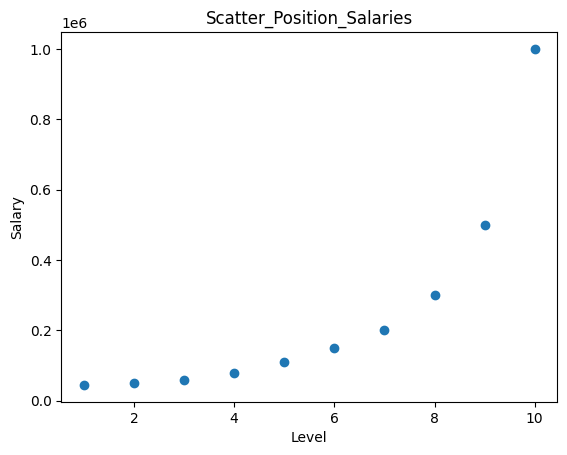

In [144]:
plt.scatter(X,y)
plt.title("Scatter_Position_Salaries")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

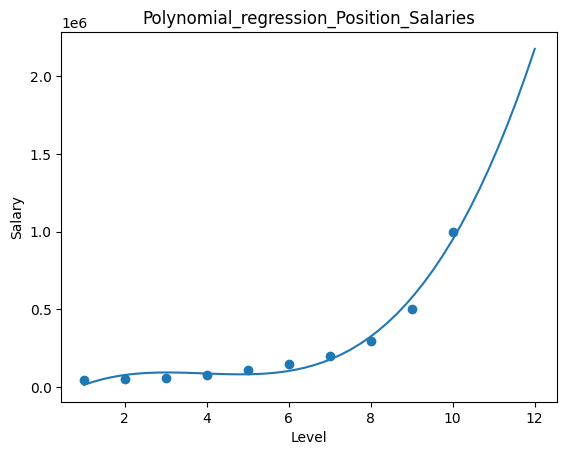

In [145]:
model = np.poly1d(np.polyfit(X, y, 3))
polyline = np.linspace(1, 12, 50)
plt.scatter(X, y)
plt.plot(polyline, model(polyline))
plt.title("Polynomial_regression_Position_Salaries")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [146]:
print(model)

      3             2
4120 x - 4.855e+04 x + 1.807e+05 x - 1.213e+05


In [147]:
X = dataframe["Level"].values.reshape(-1, 1)
y = dataframe["Salary"].values.reshape(-1, 1)

In [148]:
LinReg = LinearRegression()
LinReg.fit(X, y)

LinearRegression()

In [149]:
y_pred = LinReg.predict(X)

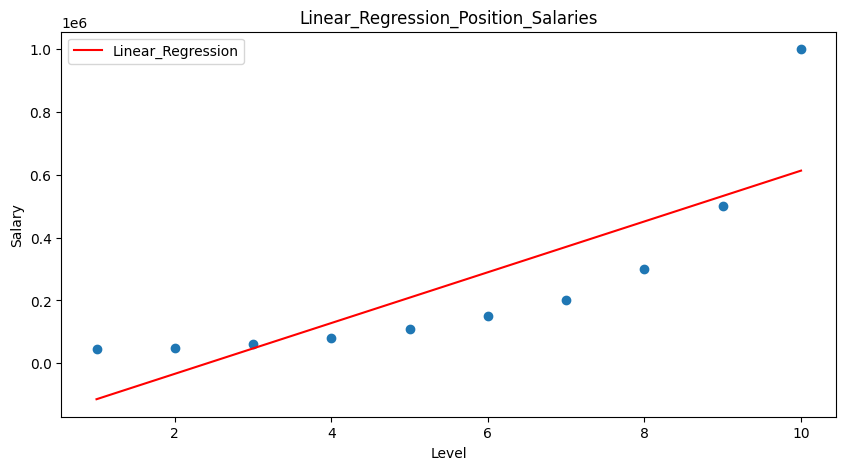

In [150]:
plt.figure(figsize=(10,5))
plt.scatter(X,y)
plt.plot(X,y_pred,color='r',label="Linear_Regression")
plt.title("Linear_Regression_Position_Salaries")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [151]:
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error for Linear Regression: {mae:.2f}')
print(f'Mean squared error for Linear Regression: {mse:.2f}')
print(f'Root mean squared error for Linear Regression: {rmse:.2f}')

Mean absolute error for Linear Regression: 128454.55
Mean squared error for Linear Regression: 26695878787.88
Root mean squared error for Linear Regression: 163388.74


In [152]:
Input=[("polynomial",PolynomialFeatures(degree=5)),("modal",LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X,y)

Pipeline(steps=[('polynomial', PolynomialFeatures(degree=5)),
                ('modal', LinearRegression())])

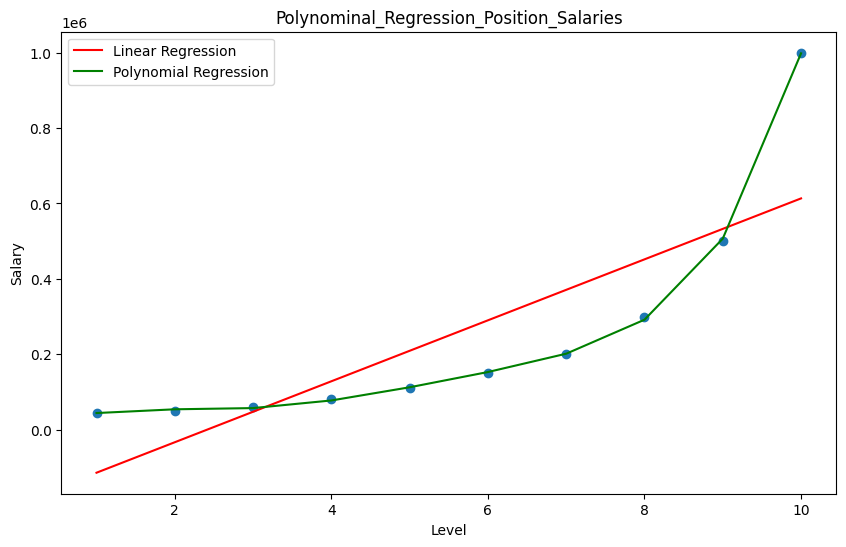

In [153]:
poly_pred=pipe.predict(X)
sorted_zip = sorted(zip(X,poly_pred))
X_poly, poly_pred = zip(*sorted_zip)

plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.plot(X,y_pred,color='r',label='Linear Regression')
plt.plot(X_poly,poly_pred,color='g',label='Polynomial Regression')
plt.title("Polynominal_Regression_Position_Salaries")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [154]:
mae_poly = mean_absolute_error(y, poly_pred)
mse_poly = mean_squared_error(y, poly_pred)
rmse_poly = np.sqrt(mse_poly)
print(f'Mean absolute error for Polynomial Regression: {mae_poly:.2f}')
print(f'Mean squared error for Polynomial Regression: {mse_poly:.2f}')
print(f'Root mean squared error for Polynomial Regression: {rmse_poly:.2f}')

Mean absolute error for Polynomial Regression: 3360.84
Mean squared error for Polynomial Regression: 16382284.38
Root mean squared error for Polynomial Regression: 4047.50
